In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
train_df = pd.read_csv('/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv')
train_df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,1,2,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,3,4,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,...,-1025.88,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,4,5,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,...,-1813.95,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,7,8,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,...,1535.00,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140


In [3]:
train_df.shape

(8000, 30)

In [4]:
train_df.isnull().sum()

Unnamed: 0       0
ID               0
class            0
20150720_N     560
20150602_N    1200
20150517_N     800
20150501_N     960
20150415_N     480
20150330_N    1120
20150314_N     720
20150226_N    1360
20150210_N     640
20150125_N    1040
20150109_N     880
20141117_N    1280
20141101_N     400
20141016_N    1440
20140930_N     800
20140813_N     560
20140626_N    1600
20140610_N     480
20140525_N     720
20140509_N     880
20140423_N    1760
20140407_N     640
20140322_N    1120
20140218_N    1440
20140202_N     560
20140117_N    1200
20140101_N     400
dtype: int64

In [5]:
ndvi_cols = [col for col in train_df.columns if '_N' in col]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, '20150720_N'),
  Text(1, 0, '20150602_N'),
  Text(2, 0, '20150517_N'),
  Text(3, 0, '20150501_N'),
  Text(4, 0, '20150415_N'),
  Text(5, 0, '20150330_N'),
  Text(6, 0, '20150314_N'),
  Text(7, 0, '20150226_N'),
  Text(8, 0, '20150210_N'),
  Text(9, 0, '20150125_N'),
  Text(10, 0, '20150109_N'),
  Text(11, 0, '20141117_N'),
  Text(12, 0, '20141101_N'),
  Text(13, 0, '20141016_N'),
  Text(14, 0, '20140930_N'),
  Text(15, 0, '20140813_N'),
  Text(16, 0, '20140626_N'),
  Text(17, 0, '20140610_N'),
  Text(18, 0, '20140525_N'),
  Text(19, 0, '20140509_N'),
  Text(20, 0, '20140423_N'),
  Text(21, 0, '20140407_N'),
  Text(22, 0, '20140322_N'),
  Text(23, 0, '20140218_N'),
  Text(24, 0, '20140202_N'),
  Text(25, 0, '20140117_N'),
  Text(26, 0, '20140101_N')])

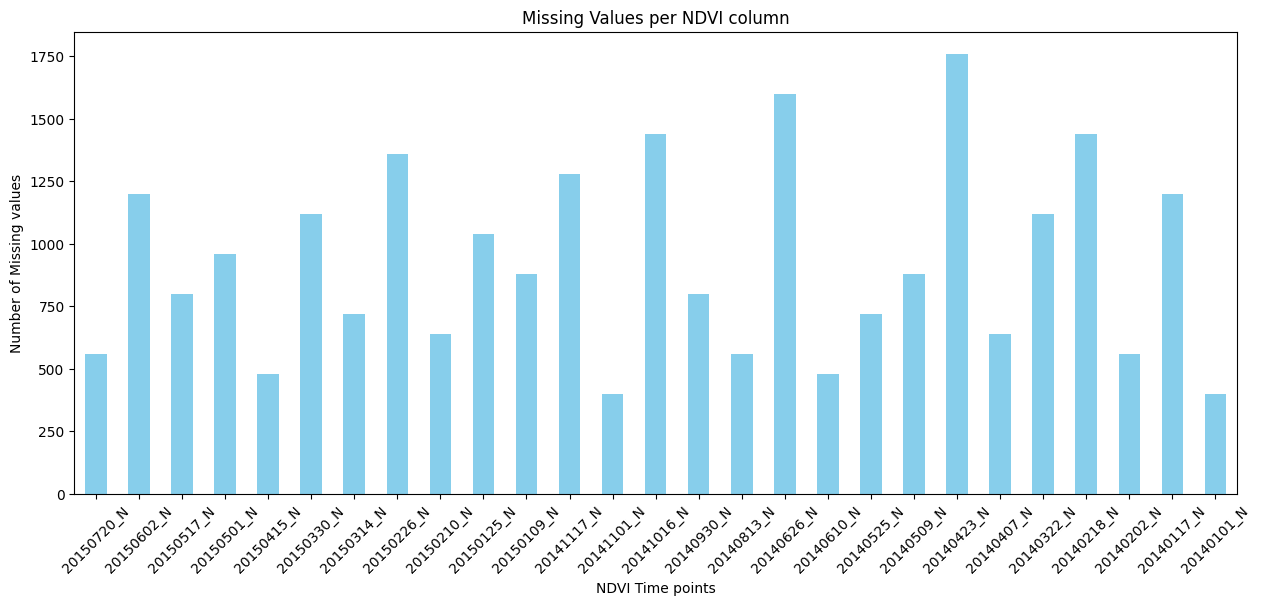

In [6]:
missing_counts = train_df[ndvi_cols].isnull().sum()
# missing_counts
plt.figure(figsize=(15,6))
missing_counts.plot(kind='bar', color='skyblue')
plt.xlabel('NDVI Time points')
plt.ylabel('Number of Missing values')
plt.title('Missing Values per NDVI column')
plt.xticks(rotation=45)


In [7]:
# fill missing values using interpolation
train_df[ndvi_cols] = train_df[ndvi_cols].interpolate(axis=1, method='linear', limit_direction='both')

In [8]:
train_df[ndvi_cols].isnull().sum()

20150720_N    0
20150602_N    0
20150517_N    0
20150501_N    0
20150415_N    0
20150330_N    0
20150314_N    0
20150226_N    0
20150210_N    0
20150125_N    0
20150109_N    0
20141117_N    0
20141101_N    0
20141016_N    0
20140930_N    0
20140813_N    0
20140626_N    0
20140610_N    0
20140525_N    0
20140509_N    0
20140423_N    0
20140407_N    0
20140322_N    0
20140218_N    0
20140202_N    0
20140117_N    0
20140101_N    0
dtype: int64

In [9]:
train_df.dtypes

Unnamed: 0      int64
ID              int64
class          object
20150720_N    float64
20150602_N    float64
20150517_N    float64
20150501_N    float64
20150415_N    float64
20150330_N    float64
20150314_N    float64
20150226_N    float64
20150210_N    float64
20150125_N    float64
20150109_N    float64
20141117_N    float64
20141101_N    float64
20141016_N    float64
20140930_N    float64
20140813_N    float64
20140626_N    float64
20140610_N    float64
20140525_N    float64
20140509_N    float64
20140423_N    float64
20140407_N    float64
20140322_N    float64
20140218_N    float64
20140202_N    float64
20140117_N    float64
20140101_N    float64
dtype: object

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'forest'),
  Text(1, 0, 'farm'),
  Text(2, 0, 'impervious'),
  Text(3, 0, 'grass'),
  Text(4, 0, 'water'),
  Text(5, 0, 'orchard')])

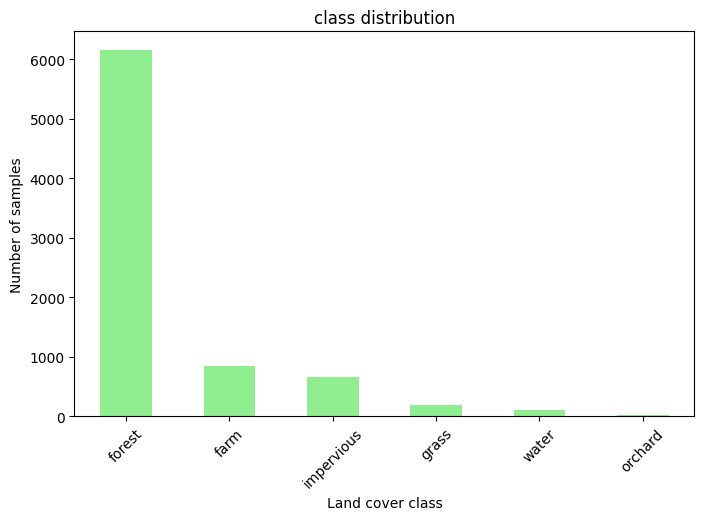

In [10]:
class_counts = train_df['class'].value_counts()
# class_counts
plt.figure(figsize=(8,5))
class_counts.plot(kind='bar', color='lightgreen')
plt.xlabel('Land cover class')
plt.ylabel('Number of samples')
plt.title('class distribution')
plt.xticks(rotation=45)

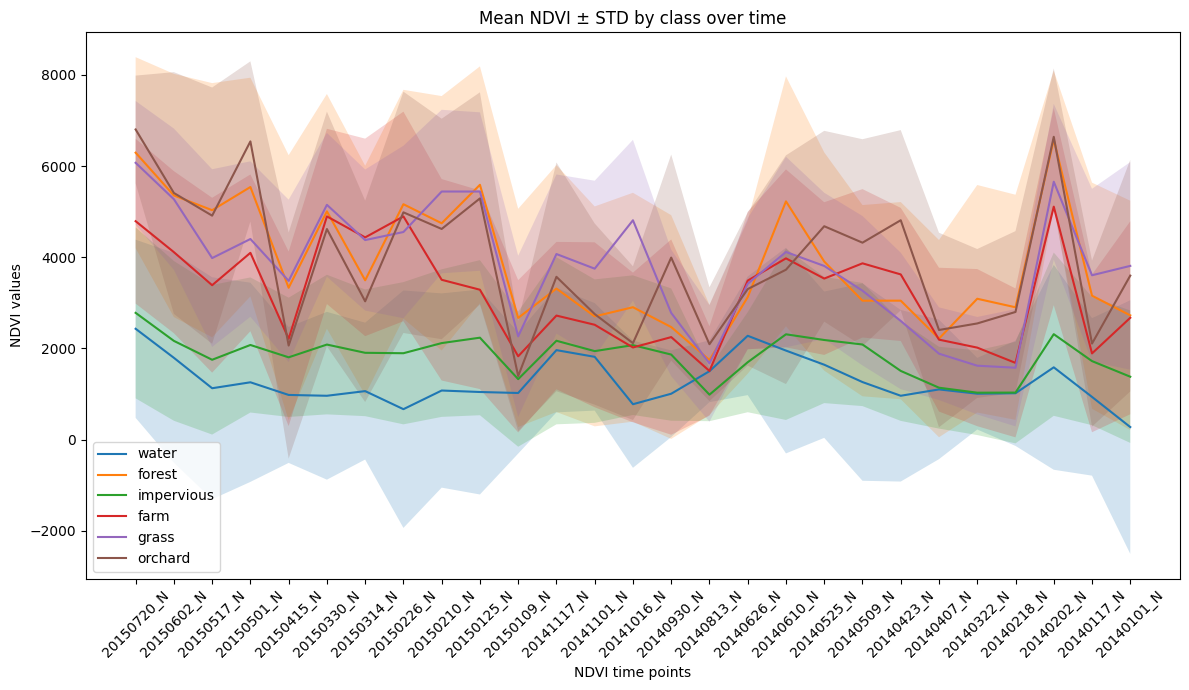

In [11]:
plt.figure(figsize=(12,7))

for land_class in train_df['class'].unique():
    class_data = train_df[train_df['class'] == land_class][ndvi_cols]

    mean_ndvi = class_data.mean(axis=0)
    std_ndvi = class_data.std(axis=0)

    plt.plot(ndvi_cols, mean_ndvi, label=land_class)
    plt.fill_between(ndvi_cols, mean_ndvi-std_ndvi, mean_ndvi+std_ndvi, alpha=0.2)

plt.xlabel('NDVI time points')
plt.ylabel('NDVI values')
plt.title('Mean NDVI ± STD by class over time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

In [12]:
#mean ndvi
train_df['ndvi_mean'] = train_df[ndvi_cols].mean(axis=1)
#standard deviation ndvi
train_df['ndvi_std'] = train_df[ndvi_cols].std(axis=1)
# maximum ndvi
train_df['ndvi_max'] = train_df[ndvi_cols].max(axis=1)
#minimum ndvi
train_df['ndvi_min'] = train_df[ndvi_cols].min(axis=1)
#ndvi range
train_df['ndvi_range'] = train_df['ndvi_max'] - train_df['ndvi_min']
#assuming earliest is the first column, latest is the last
train_df['ndvi_trend'] = train_df[ndvi_cols[-1]] - train_df[ndvi_cols[0]]
train_df['ndvi_slope'] = train_df['ndvi_trend'] / (len(ndvi_cols) - 1)
train_df['ndvi_ratio'] = train_df['ndvi_max'] / (np.abs(train_df['ndvi_min']) + 1e-5)

In [13]:
feature_cols = train_df.drop(columns=['ID', 'Unnamed: 0', 'class'])
target_col = train_df['class']

In [14]:
feature_cols

,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,20150125_N,...,20140117_N,20140101_N,ndvi_mean,ndvi_std,ndvi_max,ndvi_min,ndvi_range,ndvi_trend,ndvi_slope,ndvi_ratio
0,637.5950,658.668000,-1882.030000,-1924.360,997.904,-1739.990,630.087,-347.7765,-1325.6400,-944.084,...,-1180.1900,433.906,-269.881519,1017.144905,997.904,-2203.020,3200.924,-203.6890,-7.834192,0.452971
1,634.2400,593.705000,-1625.790000,-1672.320,914.198,-692.386,707.626,-1670.5900,-1408.6400,-989.285,...,-1360.5600,524.075,-248.218496,935.550461,914.198,-2250.000,3164.198,-110.1650,-4.237115,0.406310
2,58.0174,-1599.160000,-1325.895000,-1052.630,-1308.630,-1564.630,-417.420,729.7900,-3162.1400,-1364.372,...,-1772.8350,-1343.550,-631.649152,1045.094565,952.178,-3162.140,4114.318,-1401.5674,-53.906438,0.301118
3,72.5180,226.477000,380.436000,-1256.930,515.805,-1413.180,-802.942,683.2540,-2829.4000,-1267.540,...,-1512.0435,-826.727,-319.884926,1024.098285,1232.120,-2829.400,4061.520,-899.2450,-34.586346,0.435470
4,1136.4400,1306.903333,1477.366667,1647.830,1935.800,2047.390,2158.980,1700.9250,1242.8700,-2646.050,...,-568.0500,-1357.140,767.647759,1209.705801,2158.980,-2646.050,4805.030,-2493.5800,-95.906923,0.815926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1207.7000,984.620000,1075.435000,1166.250,937.478,1072.700,823.896,943.6980,944.6190,1040.990,...,706.7270,433.659,931.168815,309.164898,1589.000,362.882,1226.118,-774.0410,-29.770808,4.378834
7996,2170.3500,1419.720000,1361.000000,1478.710,983.911,1262.110,1422.860,1401.9700,1372.6800,1142.340,...,1589.0600,506.936,1242.406870,548.077318,2178.670,336.289,1842.381,-1663.4140,-63.977462,6.478564
7997,1895.6800,1454.740000,1244.150000,1033.560,1930.380,1057.150,1471.600,2082.6150,2693.6300,2377.550,...,2501.7200,1247.770,1568.982444,613.030419,2780.930,447.868,2333.062,-647.9100,-24.919615,6.209262
7998,3465.7400,1283.320000,413.412000,4391.050,1146.820,4473.050,1614.750,770.4690,1723.2345,2676.000,...,2074.0280,388.346,2289.178926,1589.537580,5833.760,244.594,5589.166,-3077.3940,-118.361308,23.850788


In [15]:
# encode target variable
le = LabelEncoder()
target_col_encoded = le.fit_transform(target_col)

# scale the temporal features
scaler = StandardScaler()
feature_cols_scaled = scaler.fit_transform(feature_cols)

In [16]:
from sklearn.model_selection import train_test_split
X = feature_cols_scaled
y = target_col_encoded

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [17]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

print(f'validation accuracy: {accuracy:.4f}')
print(classification_report(y_val, y_pred, target_names=le.classes_))

validation accuracy: 0.9031
              precision    recall  f1-score   support

        farm       0.72      0.55      0.63       168
      forest       0.93      0.98      0.95      1232
       grass       0.83      0.51      0.63        39
  impervious       0.83      0.84      0.84       134
     orchard       1.00      0.17      0.29         6
       water       0.76      0.62      0.68        21

    accuracy                           0.90      1600
   macro avg       0.85      0.61      0.67      1600
weighted avg       0.90      0.90      0.90      1600



In [19]:
#importing test dataset
test_df = pd.read_csv('/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv')
test_df

,Unnamed: 0,ID,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,7466.4200,413.162,5761.000,5625.45,489.4030,3923.84,3097.110,6766.42000,...,801.184,927.115,4704.14,6378.42,340.949,2695.5700,527.268,4736.75,601.843,6639.760
1,1,2,7235.2600,6037.350,1027.560,6085.14,1618.0500,6668.54,2513.990,1051.69000,...,5533.470,5103.040,5216.12,4885.27,4366.790,1234.1400,3298.110,6942.68,1070.440,842.101
2,2,3,7425.0800,6969.980,1177.940,7408.93,861.0610,7644.43,814.458,1504.29000,...,1981.390,6204.540,7021.69,5704.41,4897.450,1789.9900,2206.100,6928.93,1036.560,831.441
3,3,4,7119.1200,1731.620,6311.930,6441.61,465.9790,7128.42,1649.120,6935.22000,...,959.344,5794.150,1045.57,5572.90,586.287,685.9060,1287.000,6734.72,824.584,6883.610
4,4,5,7519.5500,8130.260,1482.540,7879.53,1001.2100,7937.60,4122.530,1094.51000,...,7636.070,6996.760,7413.43,4596.13,4511.700,1413.5200,3283.940,7937.68,1857.800,1336.920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840,2840,2841,-1673.7400,-2514.480,-2451.190,-2738.44,64.4464,-2275.03,-2881.100,-4738.97000,...,-2257.890,-2582.420,-1699.10,-2295.30,306.483,209.4030,221.920,-4885.15,-2630.590,356.233
2841,2841,2842,-96.8233,-412.727,-1795.400,-2363.82,-2168.1900,-2162.68,-3155.740,-4416.11000,...,-3991.910,-2614.910,-2109.84,-2687.18,-2853.890,71.3402,-86.414,-5109.01,324.637,-4316.580
2842,2842,2843,-2364.6000,-155.592,-1422.090,-1713.40,465.6220,-2230.40,-3088.730,-5010.32000,...,-2484.500,-1756.080,-3820.43,-1988.23,433.852,291.8000,254.548,-4259.30,412.115,-1170.750
2843,2843,2844,-3004.6300,-1217.120,180.122,-1113.89,438.4180,-2442.51,-3210.560,-3237.74000,...,-3291.490,-2018.450,-3472.65,-3109.07,511.792,369.0970,276.948,-5574.51,298.739,460.419


In [20]:
test_df.shape

(2845, 29)

In [21]:
test_df.isnull().sum()

Unnamed: 0    0
ID            0
20150720_N    0
20150602_N    0
20150517_N    0
20150501_N    0
20150415_N    0
20150330_N    0
20150314_N    0
20150226_N    0
20150210_N    0
20150125_N    0
20150109_N    0
20141117_N    0
20141101_N    0
20141016_N    0
20140930_N    0
20140813_N    0
20140626_N    0
20140610_N    0
20140525_N    0
20140509_N    0
20140423_N    0
20140407_N    0
20140322_N    0
20140218_N    0
20140202_N    0
20140117_N    0
20140101_N    0
dtype: int64

In [22]:
test_df.dtypes

Unnamed: 0      int64
ID              int64
20150720_N    float64
20150602_N    float64
20150517_N    float64
20150501_N    float64
20150415_N    float64
20150330_N    float64
20150314_N    float64
20150226_N    float64
20150210_N    float64
20150125_N    float64
20150109_N    float64
20141117_N    float64
20141101_N    float64
20141016_N    float64
20140930_N    float64
20140813_N    float64
20140626_N    float64
20140610_N    float64
20140525_N    float64
20140509_N    float64
20140423_N    float64
20140407_N    float64
20140322_N    float64
20140218_N    float64
20140202_N    float64
20140117_N    float64
20140101_N    float64
dtype: object

In [23]:
ndvi_cols_test = [col for col in test_df.columns if 'N' in col]
ndvi_cols_test

['20150720_N',
 '20150602_N',
 '20150517_N',
 '20150501_N',
 '20150415_N',
 '20150330_N',
 '20150314_N',
 '20150226_N',
 '20150210_N',
 '20150125_N',
 '20150109_N',
 '20141117_N',
 '20141101_N',
 '20141016_N',
 '20140930_N',
 '20140813_N',
 '20140626_N',
 '20140610_N',
 '20140525_N',
 '20140509_N',
 '20140423_N',
 '20140407_N',
 '20140322_N',
 '20140218_N',
 '20140202_N',
 '20140117_N',
 '20140101_N']

In [24]:
#creating temporal features

#mean ndvi
test_df['ndvi_mean'] = test_df[ndvi_cols_test].mean(axis=1)
#standard deviation ndvi
test_df['ndvi_std'] = test_df[ndvi_cols_test].std(axis=1)
# maximum ndvi
test_df['ndvi_max'] = test_df[ndvi_cols_test].max(axis=1)
#minimum ndvi
test_df['ndvi_min'] = test_df[ndvi_cols_test].min(axis=1)
#ndvi range
test_df['ndvi_range'] = test_df['ndvi_max'] - test_df['ndvi_min']

#assuming earliest is the first column, latest is the last
test_df['ndvi_trend'] = test_df[ndvi_cols_test[-1]] - test_df[ndvi_cols_test[0]]
test_df['ndvi_slope'] = test_df['ndvi_trend'] / (len(ndvi_cols_test) - 1)

test_df['ndvi_ratio'] = test_df['ndvi_max'] / (np.abs(test_df['ndvi_min']) + 1e-5)

In [25]:
test_df

,Unnamed: 0,ID,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140117_N,20140101_N,ndvi_mean,ndvi_std,ndvi_max,ndvi_min,ndvi_range,ndvi_trend,ndvi_slope,ndvi_ratio
0,0,1,7466.4200,413.162,5761.000,5625.45,489.4030,3923.84,3097.110,6766.42000,...,601.843,6639.760,3343.529778,2477.036970,7466.420,340.949,7125.471,-826.6600,-31.794615,21.898934
1,1,2,7235.2600,6037.350,1027.560,6085.14,1618.0500,6668.54,2513.990,1051.69000,...,1070.440,842.101,3750.664704,2514.860621,7425.840,535.296,6890.544,-6393.1590,-245.890731,13.872399
2,2,3,7425.0800,6969.980,1177.940,7408.93,861.0610,7644.43,814.458,1504.29000,...,1036.560,831.441,3790.384667,2807.079716,7644.430,522.798,7121.632,-6593.6390,-253.601500,14.622148
3,3,4,7119.1200,1731.620,6311.930,6441.61,465.9790,7128.42,1649.120,6935.22000,...,824.584,6883.610,3242.310704,2627.535640,7128.420,465.979,6662.441,-235.5100,-9.058077,15.297728
4,4,5,7519.5500,8130.260,1482.540,7879.53,1001.2100,7937.60,4122.530,1094.51000,...,1857.800,1336.920,4468.600704,2980.248232,8130.260,550.508,7579.752,-6182.6300,-237.793462,14.768650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840,2840,2841,-1673.7400,-2514.480,-2451.190,-2738.44,64.4464,-2275.03,-2881.100,-4738.97000,...,-2630.590,356.233,-1997.699207,1786.044716,491.678,-5611.400,6103.078,2029.9730,78.075885,0.087621
2841,2841,2842,-96.8233,-412.727,-1795.400,-2363.82,-2168.1900,-2162.68,-3155.740,-4416.11000,...,324.637,-4316.580,-2318.400781,1984.884216,556.093,-5648.660,6204.753,-4219.7567,-162.298335,0.098447
2842,2842,2843,-2364.6000,-155.592,-1422.090,-1713.40,465.6220,-2230.40,-3088.730,-5010.32000,...,412.115,-1170.750,-1640.061593,1724.990648,987.461,-5010.320,5997.781,1193.8500,45.917308,0.197085
2843,2843,2844,-3004.6300,-1217.120,180.122,-1113.89,438.4180,-2442.51,-3210.560,-3237.74000,...,298.739,460.419,-1170.447741,1782.525273,973.953,-5574.510,6548.463,3465.0490,133.271115,0.174715


In [26]:
ID = test_df['ID']
test_features = test_df.drop(columns=['ID', 'Unnamed: 0'])

In [27]:
test_features_scaled = scaler.fit_transform(test_features)

In [28]:
test_features_scaled

array([[ 0.91827497, -1.532337  ,  0.63141698, ...,  0.6802347 ,
         0.6802347 , -0.01875177],
       [ 0.8209536 ,  0.56409878, -1.0380865 , ..., -1.28291803,
        -1.28291803, -0.01875242],
       [ 0.90087029,  0.91173988, -0.98504687, ..., -1.35362187,
        -1.35362187, -0.01875236],
       ...,
       [-3.2207124 , -1.74434205, -1.90208799, ...,  1.3928136 ,
         1.3928136 , -0.01875353],
       [-3.49017336, -2.14003033, -1.33698132, ...,  2.19380368,
         2.19380368, -0.01875354],
       [-3.47774084, -2.10747777, -1.23694528, ...,  2.16812029,
         2.16812029, -0.01875354]])

In [29]:
test_pred = model.predict(test_features_scaled)

In [30]:
test_pred_labels = le.inverse_transform(test_pred)

In [31]:
submission = pd.DataFrame({
    'ID': ID,
    'class': test_pred_labels
})
submission.to_csv('submission.csv', index=False)

In [32]:
submission

,ID,class
0,1,forest
1,2,forest
2,3,orchard
3,4,forest
4,5,forest
...,...,...
2840,2841,farm
2841,2842,forest
2842,2843,forest
2843,2844,water
